In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

In [2]:
cv2.__version__

'4.6.0'

In [3]:
mp_hands = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_hands.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_hands.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_hands.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_hands.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [8]:
actions = os.listdir(os.path.join(os.getcwd(), 'Data'))

In [9]:
actions

['ban dang lam gi',
 'ban di dau the',
 'ban hieu ngon ngu ky hieu khong',
 'ban hoc lop may',
 'ban khoe khong',
 'ban muon gio roi',
 'ban phai canh giac',
 'ban ten la gi',
 'ban tien bo day',
 'ban trong cau co the',
 'bo me toi cung la nguoi Diec',
 'cai nay bao nhieu tien',
 'cai nay la cai gi',
 'cam on',
 'cap cuu',
 'chuc mung',
 'chung toi giao tiep voi nhau bang ngon ngu ky hieu',
 'con yeu me',
 'cong viec cua ban la gi',
 'hen gap lai cac ban',
 'mon nay khong ngon',
 'toi bi chong mat',
 'toi bi cuop',
 'toi bi dau dau',
 'toi bi dau hong',
 'toi bi ket xe',
 'toi bi lac',
 'toi bi phan biet doi xu',
 'toi cam thay rat hoi hop',
 'toi cam thay rat vui',
 'toi can an sang',
 'toi can di ve sinh',
 'toi can gap bac si',
 'toi can phien dich',
 'toi can thuoc',
 'toi dang an sang',
 'toi dang buon',
 'toi dang o ben xe',
 'toi dang o cong vien',
 'toi dang phai cach ly',
 'toi dang phan van',
 'toi di sieu thi',
 'toi di toi Ha Noi',
 'toi doc kem',
 'toi khoi benh roi',
 't

In [10]:
model = load_model('action.h5')

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 64)            48896     
                                                                 
 lstm_7 (LSTM)               (None, 60, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 60)                1980      
                                                                 
Total params: 205,340
Trainable params: 205,340
Non-tr

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


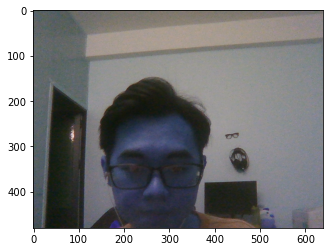

In [14]:
import cv2   
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0) 
# Set mediapipe model 
with mp_hands.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read() # đọc video từ camera
        if frame is None:
            continue
        #print(frame)
        #plt.imshow(frame)
        # Make detections
        image, results = mediapipe_detection(frame, holistic) # gọi biến image và result = giá trị RGB của ảnh
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results) # nhận diện cơ thể 
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results) # xuất ra array các keypoints cơ thể (mấy cái đốt í)
#         sequence.insert(0,keypoints)
        sequence.append(keypoints)
 
        sequence = sequence[-60:] # Đưa các frame thu đc vào mảng sequence, ở đây t để là 60 frame cuối
        
        if len(sequence) == 60:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)]) # Nếu thu đủ số frame của câu, đưa các array đấy vào model rồi ước lượng 
                                           # ra kết quả chính xác nhất trong dữ liệu
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 3: 
                sentence = sentence[-3:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)
        
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        if len(sequence) == 60:
            cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()